In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
data_set_dir = 'Face Mask Dataset'
train_data_dir = os.path.join(data_set_dir, 'Train' )
test_data_dir = os.path.join(data_set_dir, "Test")
validation_data_dir = os.path.join(data_set_dir, "Validation")

In [3]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['WithMask', 'WithoutMask']


In [4]:
import matplotlib.pyplot as plt
import cv2

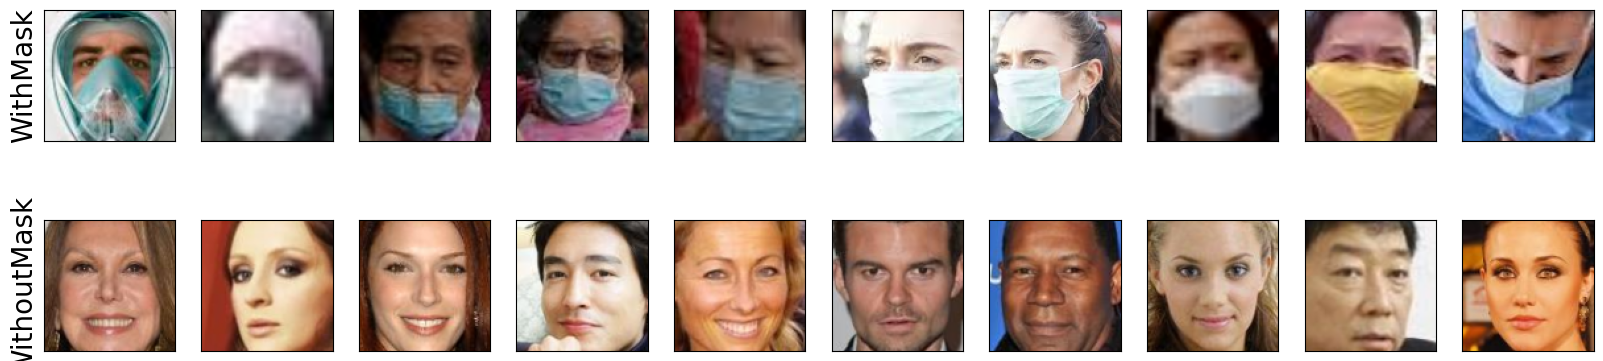

In [5]:

i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(2,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

In [6]:
train_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    train_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    # if i % 1000 == 0:
    #   break
print(len(train_data))

10000


In [7]:
valid_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(validation_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    valid_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    # if i % 200 == 0:
    #   break
print(len(valid_data))

800


In [8]:
test_data = []
i = 0
for c in CATEGORIES:
  path = os.path.join(test_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    test_data.append([img_arr, CATEGORIES.index(c)])
    i = i +1
    # if i % 200 == 0:
    #   break
print(len(test_data))

992


In [9]:
import random
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)

# train_data = train_data[:1000]
# test_data = test_data[:200]
# valid_data = valid_data[:200]

In [10]:
import numpy as np

In [11]:
X_train = []
Y_train = []
i = 0
for img, label in train_data:
  X_train.append(img)
  Y_train.append(label)
X_train = (np.array(X_train)*255).astype('float32').reshape(-1,100,100,3)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)

(10000, 100, 100, 3) (10000,)


In [12]:
X_valid = []
Y_valid = []
for img, label in valid_data:
  X_valid.append(img)
  Y_valid.append(label)
X_valid = (np.array(X_valid)*255).astype('float32').reshape(-1,100,100,3)
Y_valid = np.array(Y_valid)

print(X_valid.shape, Y_valid.shape)

(800, 100, 100, 3) (800,)


In [13]:
X_test = []
Y_test = []
for img, label in test_data:
  X_test.append(img)
  Y_test.append(label)
X_test = (np.array(X_test)*255).astype('float32').reshape(-1,100,100,3)
Y_test = np.array(Y_test)

print(X_test.shape, Y_test.shape)

(992, 100, 100, 3) (992,)


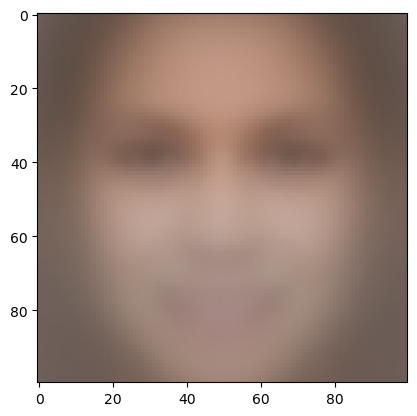

In [14]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [15]:
import pickle

In [16]:
fileObj = open("Pickle data/X_train", 'wb')
pickle.dump(X_train, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_train", 'wb')
pickle.dump(Y_train, fileObj)
fileObj.close()

fileObj = open("Pickle data/X_valid", 'wb')
pickle.dump(X_valid, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_valid", 'wb')
pickle.dump(Y_valid, fileObj)
fileObj.close()

fileObj = open("Pickle data/X_test", 'wb')
pickle.dump(X_test, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_test", 'wb')
pickle.dump(Y_test, fileObj)
fileObj.close()

fileObj = open("Pickle data/mean_img", 'wb')
pickle.dump(mean_img, fileObj)
fileObj.close()